## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results,how="inner", on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = mouse_df["Mouse ID"].count()
number_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_row = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = mouse_df[mouse_df.duplicated(["Mouse ID"])]
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.drop_duplicates("Mouse ID")
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_df['Mouse ID'].count()
clean_mouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_mouse_df = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":std,
                                 "Standard Error":sem})

summary_mouse_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
print(mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']))


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

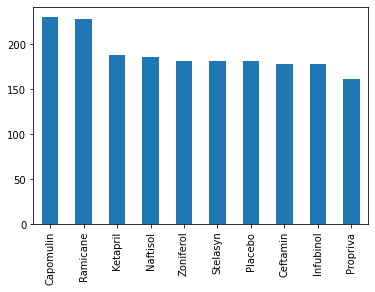

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_df['Drug Regimen'].value_counts().plot(kind='bar')
mouse_df['Drug Regimen'].value_counts()

Text(0, 0.5, '# Regimens')

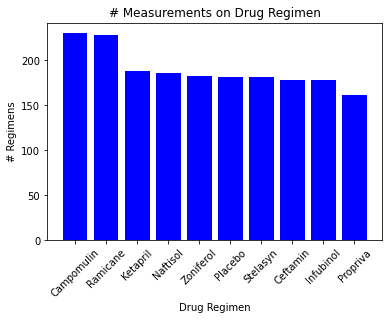

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
labels = ["Campomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]

x_axis = np.arange(len(labels))
y_axis = mouse_df['Drug Regimen'].value_counts()

plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels,rotation=45)



plt.title("# Measurements on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# Regimens")

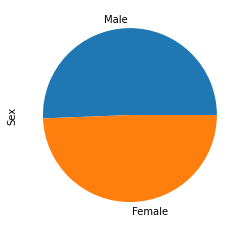

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_df['Sex'].value_counts().plot(kind='pie')


(-1.1027130801595115,
 1.105172849624489,
 -1.1045613723658971,
 1.1002172082078998)

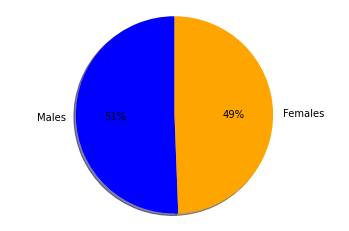

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Males", "Females"]
count = mouse_df['Sex'].value_counts()
colors = ['blue', 'orange']

plt.pie(count, labels=labels, colors=colors, autopct="%1.f%%", shadow=True, startangle=90)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_final_volume_df = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin")| 
                                    (mouse_df["Drug Regimen"] == "Ramicane")|
                                    (mouse_df["Drug Regimen"] == "Infubinol")| 
                                    (mouse_df["Drug Regimen"] == "Ceftamin")]



# Start by getting the last (greatest) timepoint for each mouse
mouse_final_volume_df = mouse_df.sort_values("Timepoint",ascending=False)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_final_volume_df.drop_duplicates(subset="Mouse ID", keep="first")

print(mouse_final_volume_df)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1892     z969     Naftisol    Male           9          30         45   
337      j119    Capomulin  Female           7          23         45   
1444     q787      Placebo    Male          17          27         45   
272      d251     Ramicane  Female           8          19         45   
1434     q633    Zoniferol    Male          12          25         45   
...       ...          ...     ...         ...         ...        ...   
441      r921     Ramicane  Female           5          25          0   
1180     m331    Zoniferol  Female          19          26          0   
1649     v991     Propriva  Female          10          30          0   
1184     m550     Ketapril    Male          18          28          0   
0        k403     Ramicane    Male          21          16          0   

      Tumor Volume (mm3)  Metastatic Sites  
1892           73.867845                 4  
337            38.125164         

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
